# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
### Write your question here.

# In a randomly selected choice, what is the expected amount of revenue per employee out of the most successful companies in the world?

In [30]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue"

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

table = soup.find("table", {'class': "wikitable"}) ## read the table from the html file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                50 non-null     object
 1   Sector              50 non-null     object
 2   Revenue (Millions)  50 non-null     int64 
 3   Profit (Millions)   50 non-null     int64 
 4   Employees           50 non-null     int64 
 5   Geographic HQ       50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


C:\Users\Luis Ochoa\AppData\Local\Temp\ipykernel_4920\1775344334.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  newFile = pd.read_html(str(table))


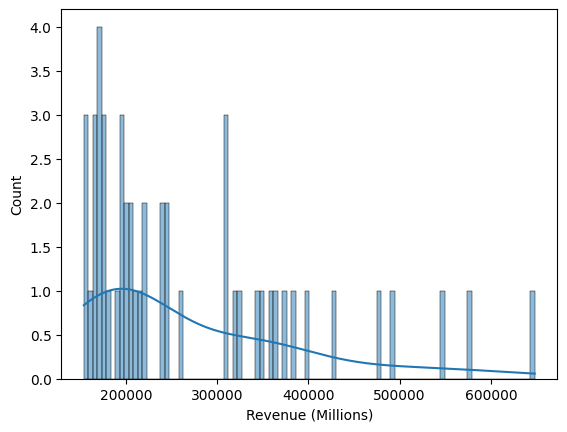

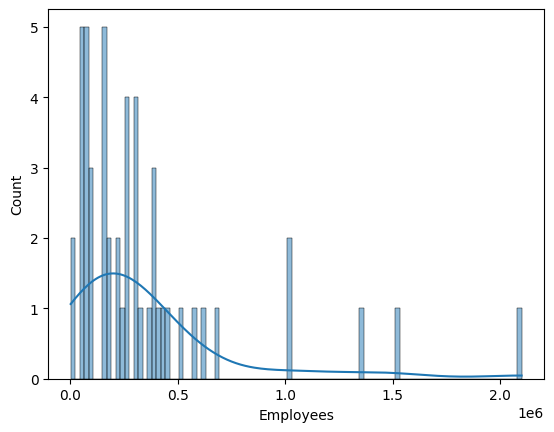

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                50 non-null     object
 1   Sector              50 non-null     object
 2   Revenue (Millions)  50 non-null     int64 
 3   Profit (Millions)   50 non-null     int64 
 4   Employees           50 non-null     int64 
 5   Geographic HQ       50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB
                                       Name  Employees
0                                   Walmart    2100000
1                                    Amazon    1525000
2           State Grid Corporation of China    1361423
3                              Saudi Aramco      73311
4           China Petrochemical Corporation     513434
5      China National Petroleum Corporation    1026301
6                                     Vitol       1560
7                       

In [31]:
newFile = pd.read_html(str(table)) 
dataFrame = newFile[0]

rows = table.find_all('tr')
data = []
for row in rows:
    cells = row.find_all('td') 
    if cells: 
        data.append({
            'Name': cells[0].text.strip(), 
            'Sector': cells[1].text.strip(),
            'Revenue (Millions)': cells[2].text.strip(),
            'Profit (Millions)': cells[3].text.strip(),
            'Employees': cells[4].text.strip(),
            'Geographic HQ': cells[5].text.strip()
        })

df = pd.DataFrame(data)
df.to_csv('companies', index=False)

data = pd.read_csv('companies')

data['Revenue (Millions)'] = data['Revenue (Millions)'].str.replace('[$,]', '', regex=True).astype(int)
data['Employees'] = data['Employees'].str.replace('[$,]', '', regex=True).astype(int)
data['Profit (Millions)'] = data['Profit (Millions)'].str.replace('[$,]', '', regex=True).astype(int)

data.info()

sns.histplot(data=data["Revenue (Millions)"], bins=100, kde=True )
plt.show()

sns.histplot(data=data["Employees"], bins=100, kde=True)
plt.show()

##print(dataFrame)
data.info()


mania = ["Name", "Employees"]
nData = data[mania]
print(nData)

emp = ["Employees"]
employees = data["Employees"]


def findQuantile(money):
    quantile = data[money].quantile(.5)
    print(f"The Median Value of the {money} column is {quantile}")

##findQuantile(emp)

def findAverage(money):
    average = data[money].mean()
    print(f"The Average Value of the {money} column is {average}")

##findAverage(emp)

##sns.histplot(employees, kde=True, color='red')
###plt.show()

###findAverage("Employees")
###findAverage("Revenue (Millions)")

def revenuePerEmployee(company):
    if company in data['Name'].values:
        company_data = data[data['Name'] == company]
        ###print(company_data["Revenue (Millions)"])
        ###print(company_data["Employees"])
        revenue = (company_data["Revenue (Millions)"] * 1000000) / company_data["Employees"]
        print(f"The expected revenue generated per employee for {company} is {revenue} million.")
    else:
        print(f"Couldn't generate information for {company}.")

revenuePerEmployee("Walmart")
revenuePerEmployee("Amazon")
revenuePerEmployee("Saudi Aramco")

q = data["Revenue (Millions)"].mean() ## Expected Value Calculation 
a = data["Employees"].mean()
true = (q * 1000000) / a    
print(f"The Expected Revenue generated per employee of all companies listed is {true}")

***Describe analysis here.***

DISCLAIMER: I MESSED UP BUT DON'T WANT TO WASTE MY EFFORT - Please disregard this information and continue to the next cell

#The Expected Revenue generated per employee of all companies listed is 764968.0504485277. This was performed using the function that checks the mean values of our selected variables (Employees, Revenue) and dividing R/E for the result. 
#As seen in our histplots above, a value of 764968 is within the means of logical analysis. The peak of values for revenue displayed is ~200,000,000,000 with the mean value of employees being ~250,000. If we simply divide these values by hand (200000000000 / 250000) we will get an end value of 800,000. With rough estimation, this empirical solutuon  matched our found value of 764968.05. 


***I just saw I didn't do the correct part of the project. Let me continue with a new question "What is the probability that a randomly chosen employee works in a US-based company"?


***Describe analysis here.***

In [32]:
us = data[data['Geographic HQ'] == 'United States']

total = data['Employees'].sum()

usEmployees = us['Employees'].sum()

probability = usEmployees / total

probability

np.float64(0.41583011600462977)

Here we are calcluating the empirable probability of an employee being part of US based company. We are essentially just taking the pool of employeees at US based companies and dividing them against the total pool of workers to find the percentage that are employeed domestically.
We find the empirable probability of domestic business employment for the largest companies to be 41.58%

In [ ]:
data['EmployeePercentage'] = data['Employees'] / total

def simulateUsBase(simulations=10000000):
    companyNames = data['Name'].values
    employeePercentages = data['EmployeePercentage'].values
    geographicHq = data['Geographic HQ'].values

    usBased = 0
    for _ in range(simulations):
        companyCountry = np.random.choice(len(companyNames), p=employeePercentages)
        if geographicHq[companyCountry] == 'United States':
            usBased += 1

    return usBased / simulations

simulatedProbability = simulateUsBase()
percentage = simulatedProbability * 100
print(f"The Probability of a randomly selected employee working for a US based company is {percentage}%")


The Probability of a randomly selected employee working for a US based company is 41.57267%


We can run a simulation that will perform a similar function, finding that a randomly selected employee's probability for working in US based company is ~41.57267%. The simulation was ran 1,000,0000 times. The way this simulation works is it initially finds the percentage of employees each company employs. After finding this amount, it uses it in a definiion function that runs a random choice selection system. It randomly selects countries out of the column of the file using the percentage of employees employed. (Smaller employment bases have less changes of being selected) I created from scraping the wikipedia webpage. If the random country selected is US based, it adds + 1 to my "usBased" variable. Bada bind, badaboom, we have our probability.      :O